# PCA

By: Jimuel Celeste, Jr. 

Objective: To analyze PCA artifacts.

In [1]:
import math
import os
import pickle 

import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
import sklearn 

In [2]:
sns.set_context('talk')
sns.set_style('whitegrid')

## Pipeline

In [3]:
model = '/Users/jimuelcelestejr/Documents/codebook/MLSpeech4MH/results/ADrESS2020/machine_learning/nested_cv/replication_regression/lftk_features/svm_regressor/final_model/model.pkl'
with open(model, 'rb') as f:
    pipe = pickle.load(f)

In [4]:
pipe

Pipeline(steps=[('feature_scaler', StandardScaler()),
                ('pca', PCA(n_components=20)),
                ('model', SVR(C=0.1, kernel='linear'))])

## Scree Plot 

Explained Variance Ratio of the Principal Components

In [5]:
pca = pipe[1]
pca

PCA(n_components=20)

In [6]:
explained_variance_ratio = pca.explained_variance_ratio_
explained_variance_ratio

array([0.24416827, 0.08975601, 0.07415287, 0.0625205 , 0.05007631,
       0.04212306, 0.03218455, 0.02913432, 0.02787588, 0.02679064,
       0.02453947, 0.02327686, 0.02113751, 0.01992321, 0.01689812,
       0.01645661, 0.01612745, 0.01407769, 0.01358825, 0.01334159])

Text(0, 0.5, 'Explained Variance Ratio')

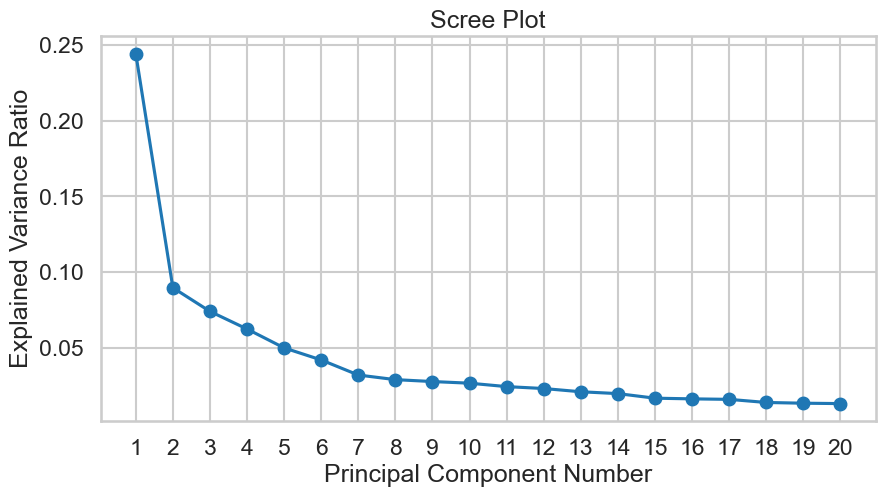

In [7]:
comp_nums = range(1, len(explained_variance_ratio) + 1)
plt.figure(figsize=(10, 5))
plt.xticks(comp_nums)
plt.plot(comp_nums, explained_variance_ratio, marker='o', linestyle='-')
plt.title('Scree Plot')
plt.xlabel('Principal Component Number')
plt.ylabel('Explained Variance Ratio') # Eigenvalue

## Loadings Plot

In [8]:
sca = pipe[0]
sca

StandardScaler()

In [9]:
features = sca.feature_names_in_
comp = pca.components_
loadings = pd.DataFrame(comp, columns=features)
loadings = loadings.set_axis(range(1, len(loadings) + 1))
loadings

,t_word,t_stopword,t_punct,t_syll,t_syll2,t_syll3,t_uword,t_sent,t_char,a_word_ps,...,a_space_ps,fkre,fkgl,fogi,smog,cole,auto,rt_fast,rt_average,rt_slow
1,0.138032,0.137937,0.080953,0.139216,0.099301,0.045305,0.141750,0.080264,0.139274,0.106514,...,-0.011358,-0.036084,0.074566,0.097996,0.035963,0.067238,0.070146,0.138029,0.138026,0.138033
2,-0.069591,-0.066751,-0.148967,-0.059114,-0.030184,0.019485,-0.029816,-0.161624,-0.058247,0.115598,...,-0.086656,-0.098278,0.128427,0.090835,0.037320,0.172725,0.152428,-0.069595,-0.069615,-0.069579
3,0.014856,-0.009555,0.054936,0.024008,-0.017905,-0.022320,0.018254,0.047272,0.023618,-0.056478,...,0.042968,-0.047184,0.013759,-0.059456,-0.025257,-0.024932,0.015268,0.014811,0.014863,0.014861
4,-0.029611,-0.039336,-0.053750,-0.011594,0.061066,0.080672,0.036606,-0.049099,-0.019090,0.023155,...,0.131972,-0.130830,0.115045,0.084227,0.106904,0.069641,0.082437,-0.029560,-0.029619,-0.029591
5,-0.023799,-0.008579,-0.028751,-0.028037,-0.026261,-0.017934,-0.014666,-0.040097,-0.031365,0.018633,...,0.017774,0.035547,-0.020581,0.008906,-0.038518,-0.035781,-0.057081,-0.023855,-0.023854,-0.023844
6,-0.005830,-0.007427,-0.100152,-0.018956,-0.062898,-0.063184,-0.043050,-0.088863,-0.005630,0.120408,...,0.168545,0.082749,-0.014992,0.039520,-0.056683,0.035585,0.057654,-0.005833,-0.005899,-0.005851
7,-0.048267,-0.039345,-0.092783,-0.050521,-0.011769,-0.033323,-0.025281,-0.091604,-0.050472,0.037100,...,-0.025530,0.027207,-0.005992,0.031190,-0.024831,-0.050513,0.002703,-0.048335,-0.048273,-0.048259
8,0.011613,0.010818,0.013320,0.005768,-0.106550,-0.118222,0.021222,-0.006642,0.004480,0.035516,...,-0.024671,0.060532,-0.033445,-0.062281,-0.110683,-0.001723,-0.040150,0.011571,0.011645,0.011675
9,0.007323,0.015655,-0.012109,-0.012785,-0.054671,-0.072700,-0.015691,-0.014377,-0.001662,0.062751,...,0.095914,0.067571,-0.027459,0.007193,-0.059567,-0.035889,0.012505,0.007325,0.007265,0.007294
10,-0.010895,-0.014190,0.001480,0.000624,0.050689,0.023441,-0.002588,0.006494,-0.008945,0.041003,...,-0.133838,-0.112653,0.108081,0.076867,0.052273,-0.044014,0.074216,-0.010998,-0.010817,-0.010839


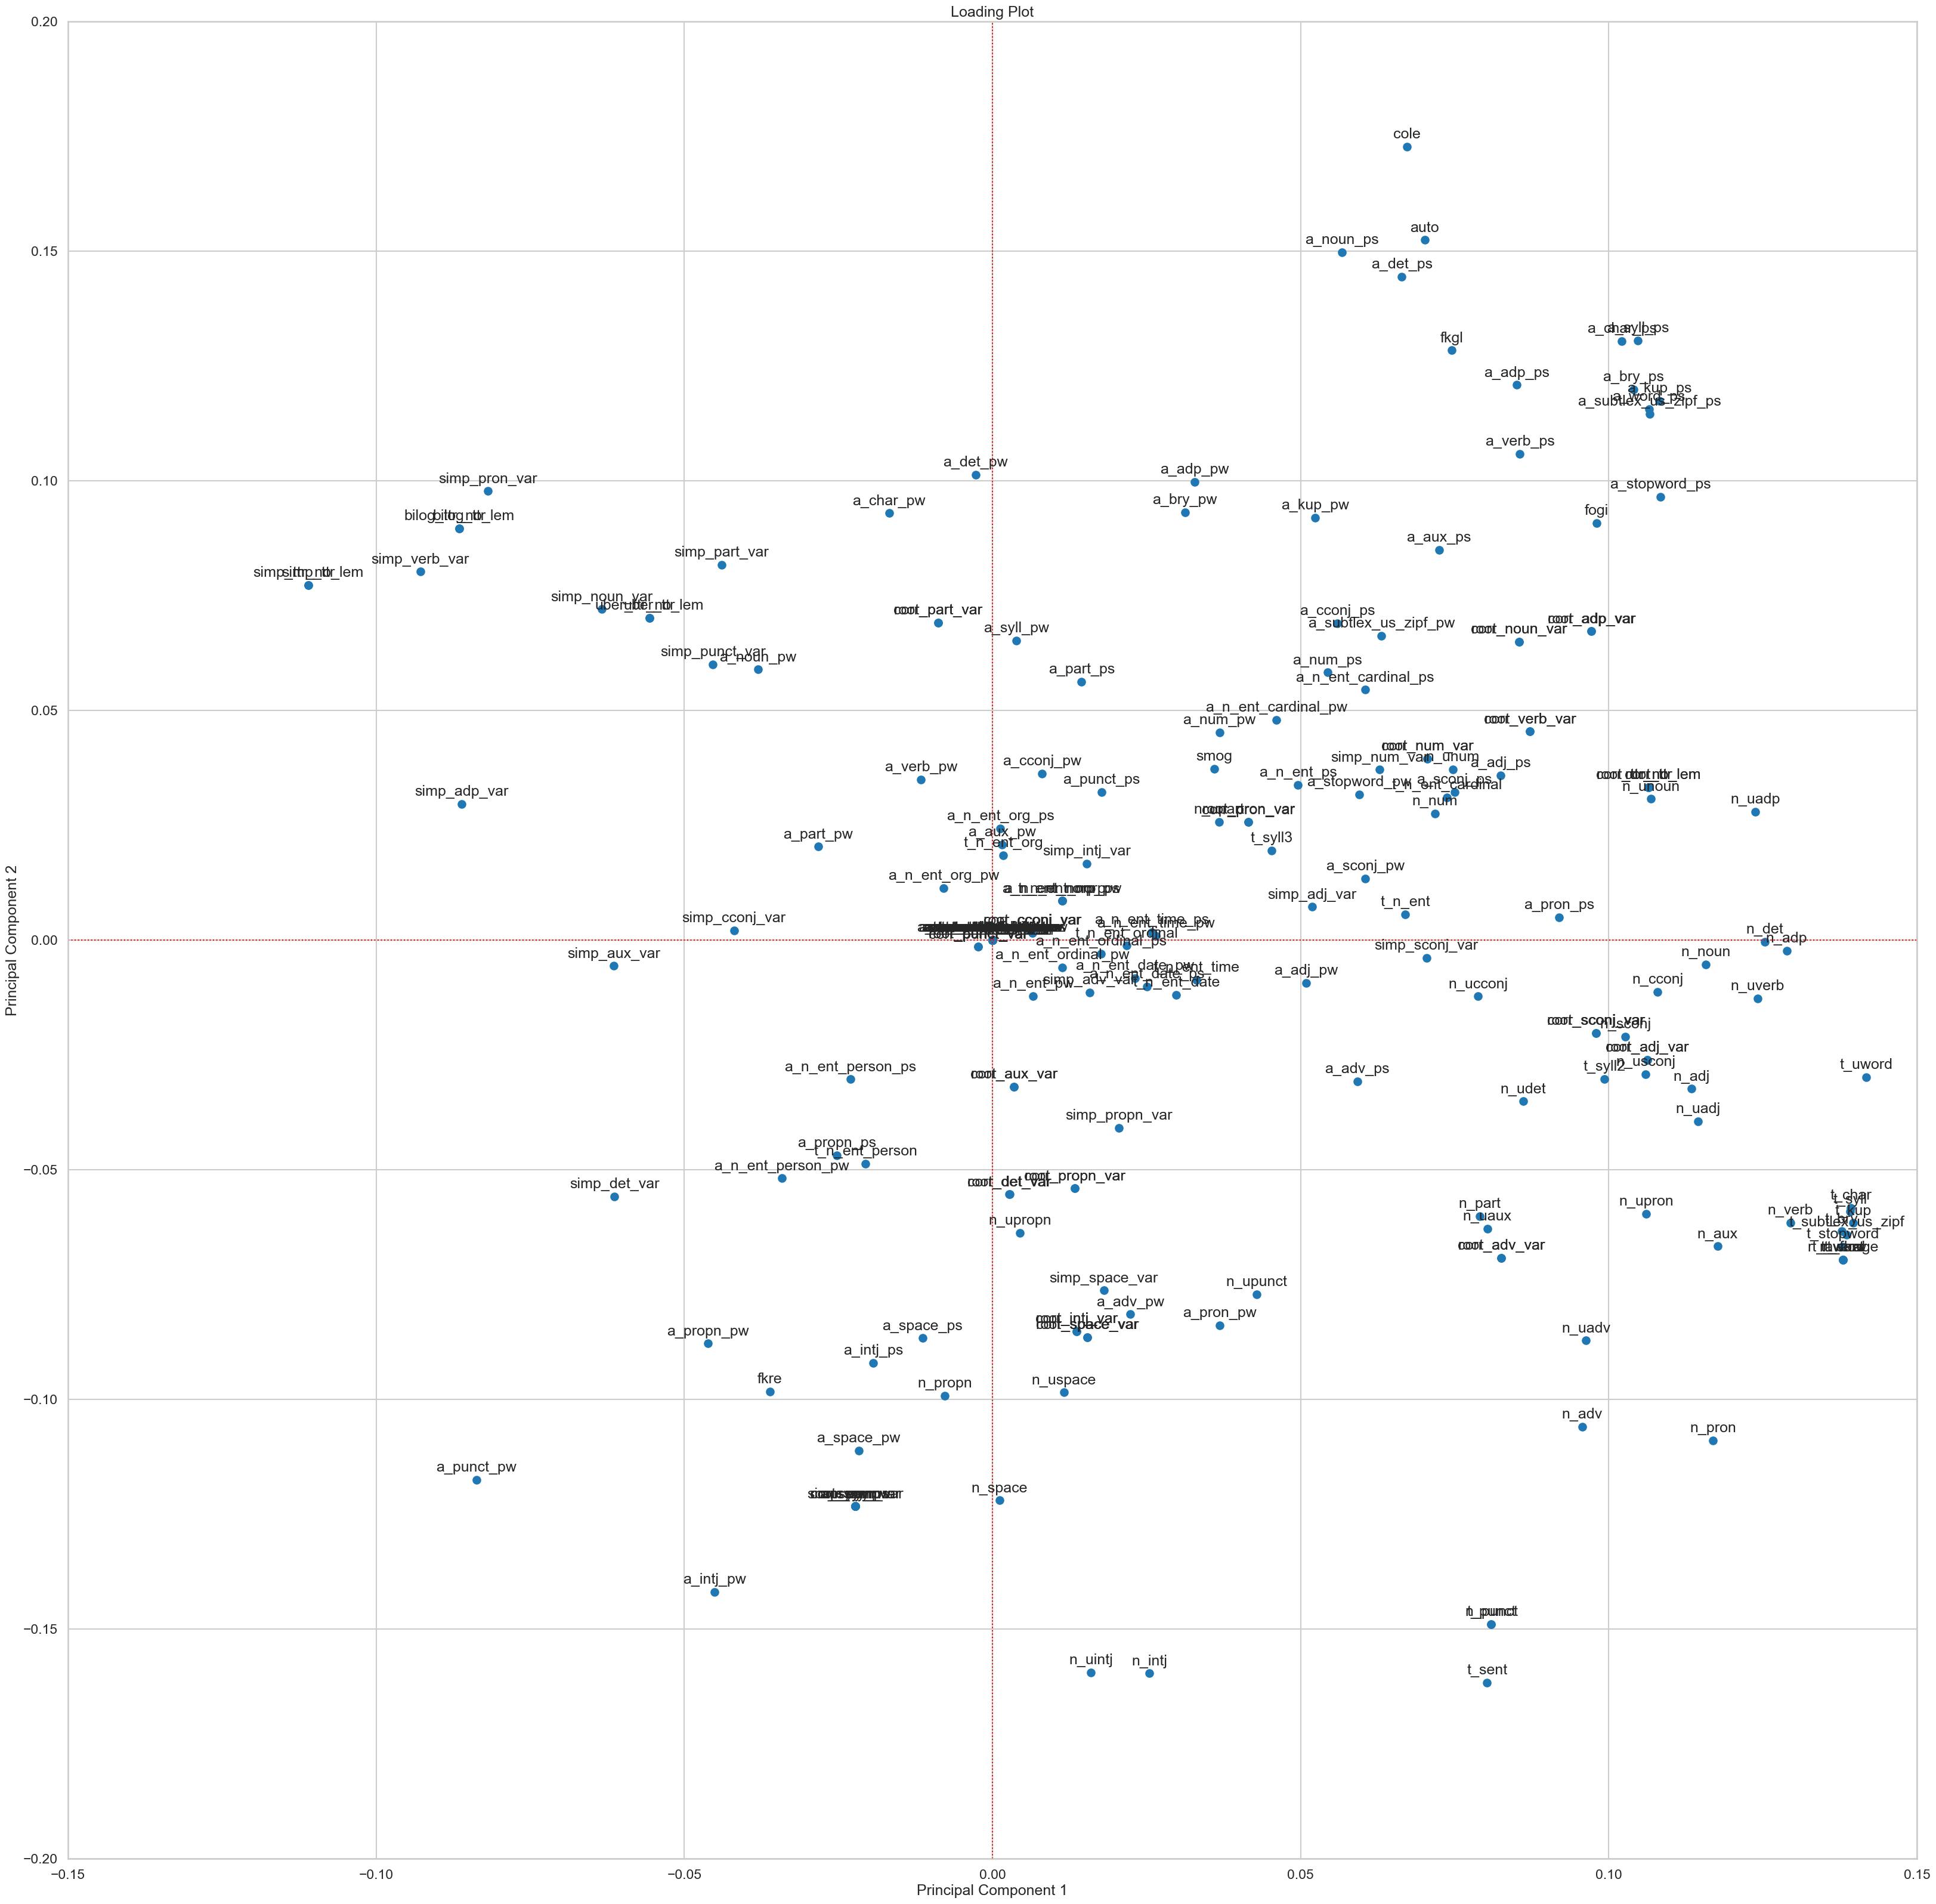

In [10]:
plt.figure(figsize=(40,40))
plt.title('Loading Plot')
plt.scatter(x=loadings.loc[1], y=loadings.loc[2])
plt.axhline(y=0, color='r', linestyle=':', linewidth=1.5)
plt.axvline(x=0, color='r', linestyle=':', linewidth=1.5)
plt.xlim(-0.15, 0.15)
plt.ylim(-0.20, 0.20)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

for i, feature in enumerate(features):
    plt.annotate(feature, (loadings.loc[1][feature], loadings.loc[2][feature]), # Coordinates of the point
                 textcoords="offset points", # How to position the text
                 xytext=(0,10), # Distance from the point to the text
                 ha='center') # Horizontal alignment of the text

Text(0.5, 66.98958333333331, 'Principal Component Number')

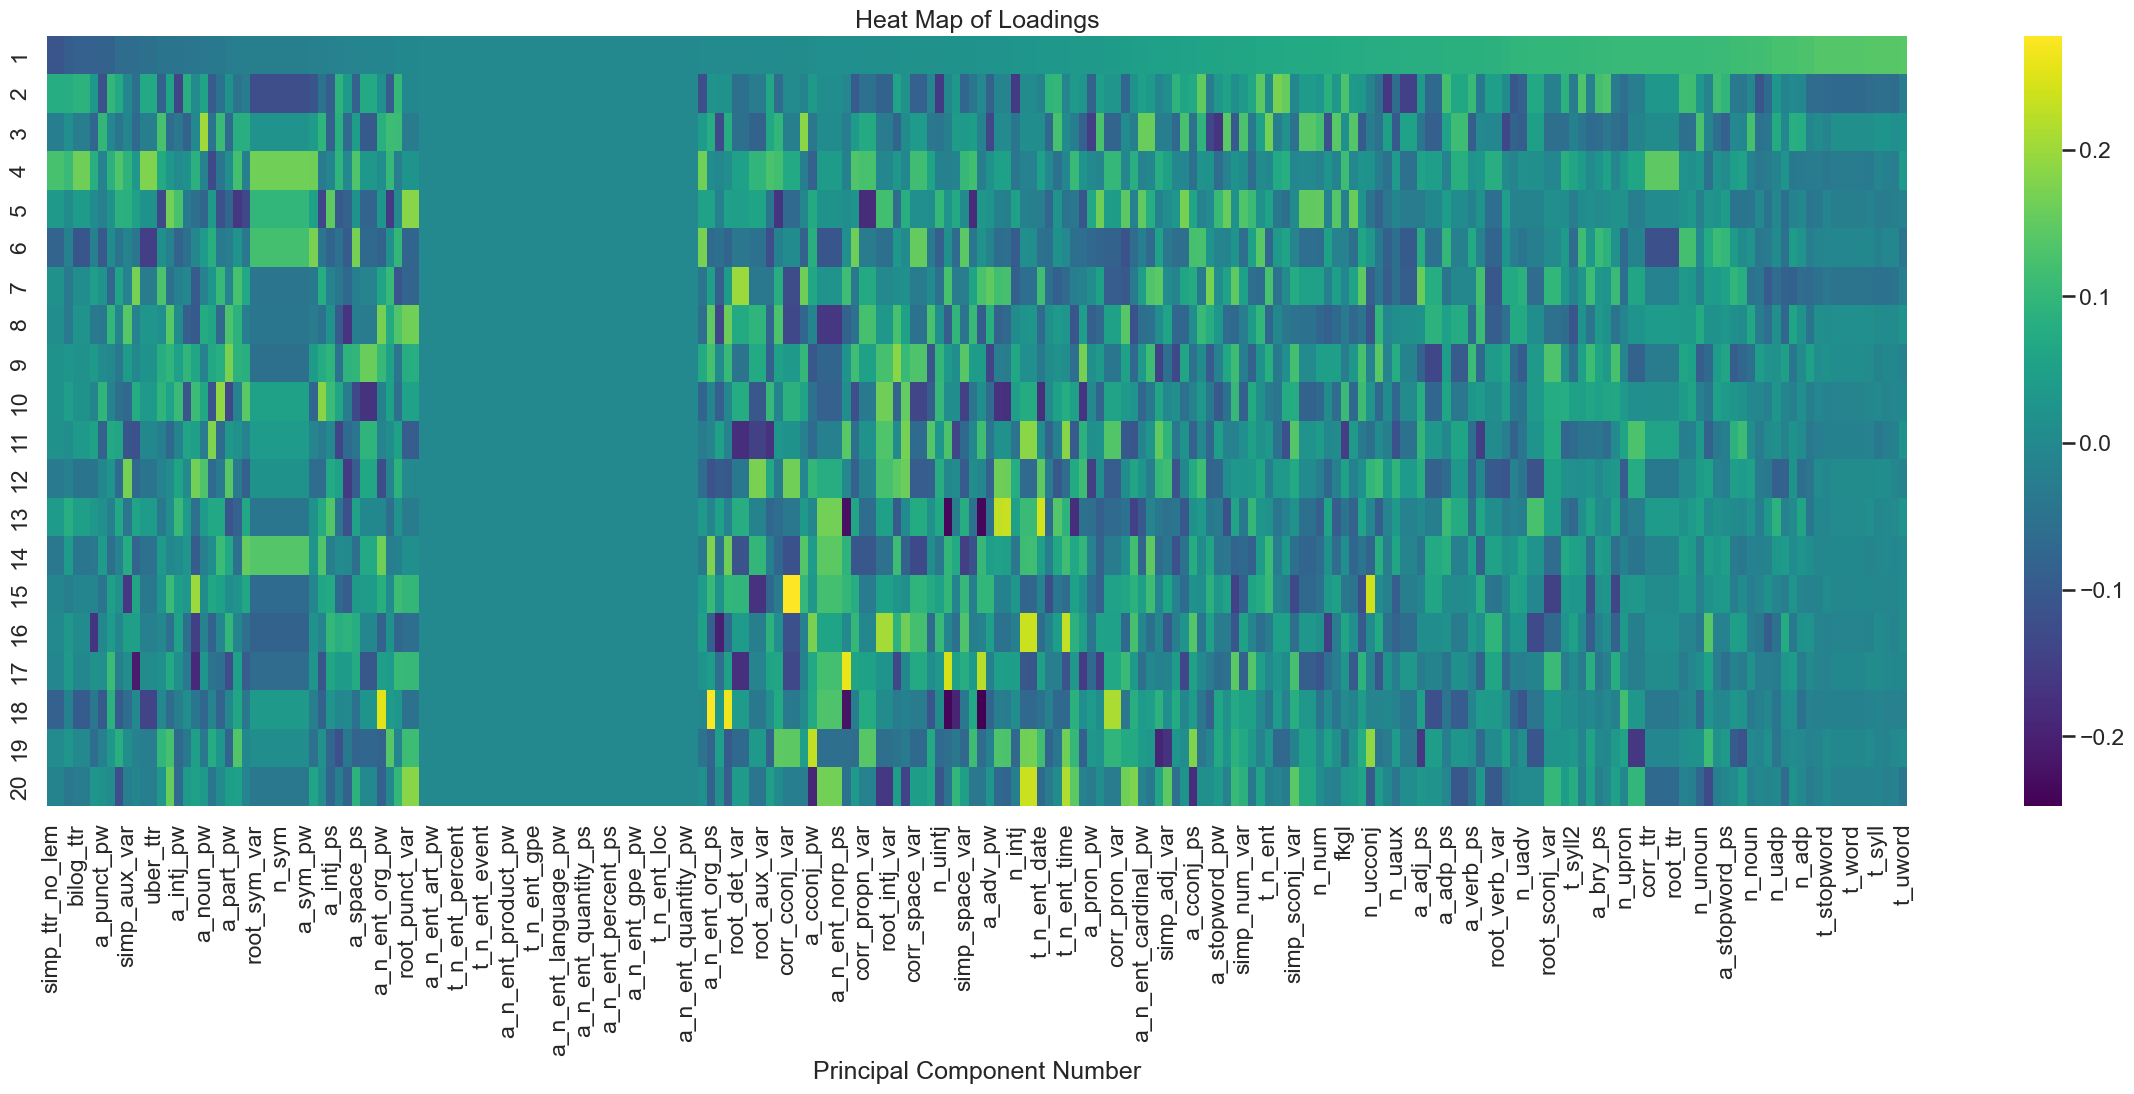

In [11]:
# Sort by first principal component
sorted_column_order = loadings.loc[1].sort_values().index
loadings = loadings[sorted_column_order]

plt.figure(figsize=(30, 10)) # Adjust figure size as needed
sns.heatmap(loadings, annot=False, cmap='viridis', fmt=".1f")
plt.title('Heat Map of Loadings')
plt.xlabel('Principal Component Number')

Text(0.5, 66.98958333333331, 'Principal Component Number')

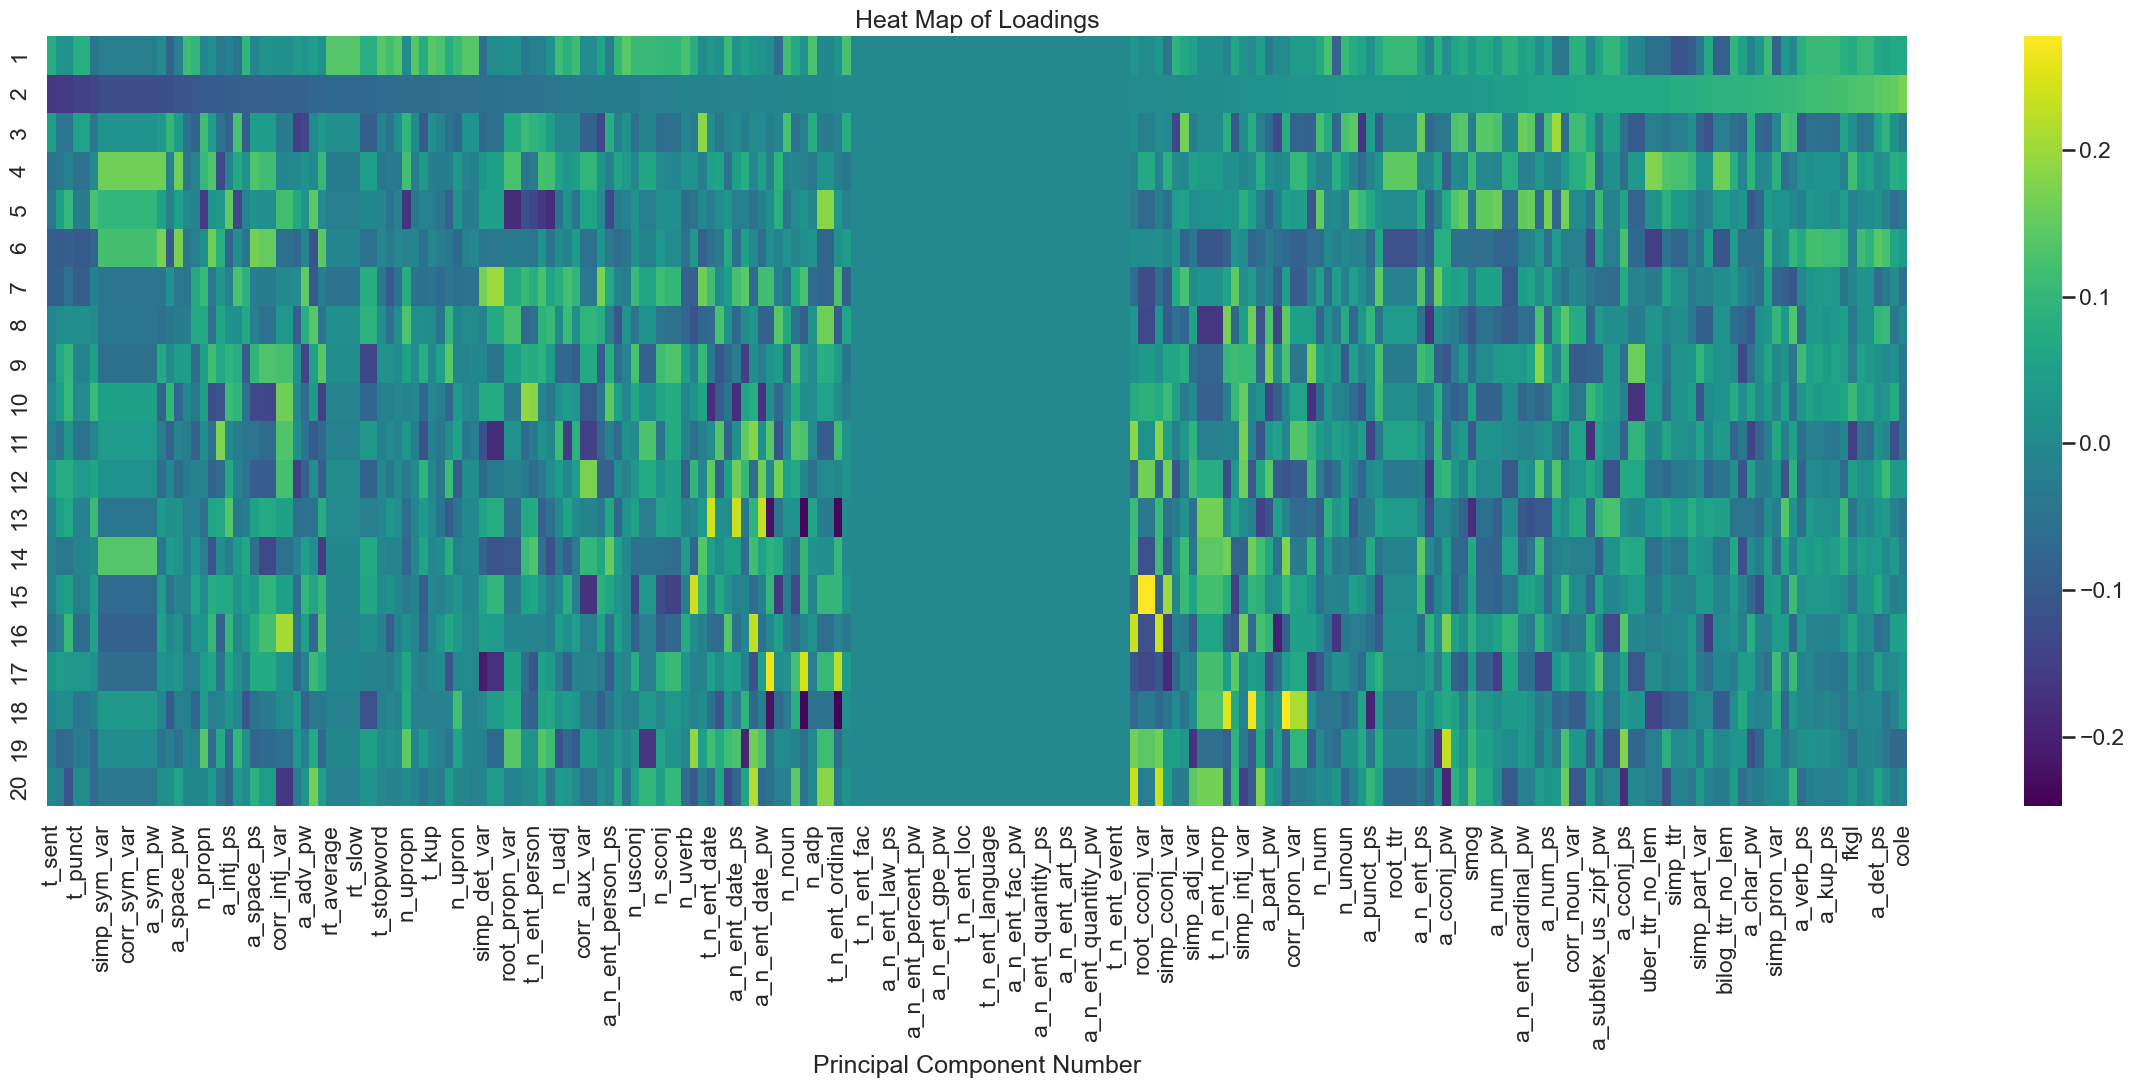

In [12]:
# Sort by second principal component
sorted_column_order = loadings.loc[2].sort_values().index
loadings = loadings[sorted_column_order]

plt.figure(figsize=(30, 10)) # Adjust figure size as needed
sns.heatmap(loadings, annot=False, cmap='viridis', fmt=".1f")
plt.title('Heat Map of Loadings')
plt.xlabel('Principal Component Number')

In [13]:
# distance from origin
def distance(x, y):
    return math.sqrt(x**2 + y**2)

distance(3, 4), distance(-3, 4), distance(3, -4), distance(-3, -4)

(5.0, 5.0, 5.0, 5.0)

In [14]:
comp_1_2 = loadings.loc[1:2]
comp_1_2.loc['distance'] = comp_1_2.apply(lambda x: distance(x[1], x[2]))
sorted_column_order = comp_1_2.loc['distance'].sort_values(ascending=False).index
comp_1_2 = comp_1_2[sorted_column_order]
comp_1_2

/var/folders/ny/jv8cwgpx7ng41dfgnqsvzdnw0000gn/T/ipykernel_16672/3423134916.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comp_1_2.loc['distance'] = comp_1_2.apply(lambda x: distance(x[1], x[2]))


,cole,t_sent,t_punct,n_punct,auto,a_syll_ps,a_char_ps,n_intj,n_uintj,a_noun_ps,...,a_n_ent_fac_pw,a_n_ent_fac_ps,a_n_ent_gpe_ps,a_n_ent_art_ps,t_n_ent_language,a_n_ent_money_pw,a_n_ent_percent_ps,a_n_ent_money_ps,a_n_ent_quantity_ps,a_n_ent_language_pw
1,0.067238,0.080264,0.080953,0.080953,0.070146,0.104740,0.102118,0.025451,0.015988,0.056725,...,-6.727168e-18,4.602727e-18,8.076591e-19,6.217876e-19,-1.344521e-19,-3.256056e-18,7.759080e-19,-1.329138e-19,3.772602e-19,-6.369240e-19
2,0.172725,-0.161624,-0.148967,-0.148967,0.152428,0.130578,0.130411,-0.159659,-0.159457,0.149735,...,-2.366258e-18,3.148428e-18,-4.721060e-18,4.391149e-18,-4.423222e-18,-2.749940e-18,-1.625813e-18,-1.530679e-18,-1.448290e-18,-7.854021e-19
distance,0.185350,0.180457,0.169542,0.169542,0.167794,0.167394,0.165636,0.161675,0.160256,0.160120,...,7.131197e-18,5.576531e-18,4.789648e-18,4.434953e-18,4.425265e-18,4.261933e-18,1.801472e-18,1.536439e-18,1.496619e-18,1.011202e-18


## Ordered features by distance from origin

This distance is interpreted as importance or influence of the features to the principal components.

In [15]:
for feature in comp_1_2.columns:
    d = round(comp_1_2.loc['distance', feature], ndigits=5)
    print(d, feature)

0.18535 cole
0.18046 t_sent
0.16954 t_punct
0.16954 n_punct
0.16779 auto
0.16739 a_syll_ps
0.16564 a_char_ps
0.16168 n_intj
0.16026 n_uintj
0.16012 a_noun_ps
0.15981 n_pron
0.15973 a_kup_ps
0.15902 a_det_ps
0.15877 a_bry_ps
0.15719 a_word_ps
0.15651 a_subtlex_us_zipf_ps
0.15459 rt_average
0.15458 t_word
0.15458 rt_fast
0.15458 rt_slow
0.15324 t_stopword
0.15273 t_subtlex_us_zipf
0.15266 t_kup
0.15167 t_bry
0.15125 t_syll
0.15096 t_char
0.14887 a_intj_pw
0.1485 fkgl
0.14779 a_adp_ps
0.14519 a_stopword_ps
0.14485 t_uword
0.14425 a_punct_pw
0.14335 n_verb
0.14275 n_adv
0.13616 a_verb_ps
0.13525 simp_ttr_no_lem
0.13525 simp_ttr
0.13522 n_aux
0.13362 fogi
0.1299 n_uadv
0.12889 n_adp
0.12748 simp_pron_var
0.1269 n_uadp
0.12533 n_det
0.12526 simp_sym_var
0.12526 a_sym_ps
0.12526 corr_sym_var
0.12526 n_sym
0.12526 n_usym
0.12526 root_sym_var
0.12526 a_sym_pw
0.12478 n_uverb
0.12458 bilog_ttr_no_lem
0.12458 bilog_ttr
0.12271 simp_verb_var
0.12199 n_space
0.1217 n_upron
0.12107 n_uadj
0.11821 co